<a href="https://colab.research.google.com/github/SdShreyaSd/SdShreyaSd.github.io/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

In [32]:
company = 'AAPL'


In [87]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2023,1,1)
!ping www.yahoo.com


/bin/bash: line 1: ping: command not found


In [88]:
data = web.DataReader(company,'stooq',start,end)

In [89]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days = 60

In [90]:
x_train =[]
y_train=[]
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

In [91]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = y_train.reshape(-1,1)

In [92]:
model = Sequential()


In [93]:
model.add(LSTM(units=50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=70,batch_size=45)


Epoch 1/70
61/61 [==============================] - 11s 83ms/step - loss: 0.0140
Epoch 2/70
61/61 [==============================] - 7s 109ms/step - loss: 0.0028
Epoch 3/70
61/61 [==============================] - 5s 82ms/step - loss: 0.0017
Epoch 4/70
61/61 [==============================] - 6s 103ms/step - loss: 0.0018
Epoch 5/70
61/61 [==============================] - 5s 81ms/step - loss: 0.0017
Epoch 6/70
61/61 [==============================] - 6s 91ms/step - loss: 0.0017
Epoch 7/70
61/61 [==============================] - 6s 100ms/step - loss: 0.0016
Epoch 8/70
61/61 [==============================] - 5s 82ms/step - loss: 0.0017
Epoch 9/70
61/61 [==============================] - 6s 105ms/step - loss: 0.0015
Epoch 10/70
61/61 [==============================] - 5s 84ms/step - loss: 0.0014
Epoch 11/70
61/61 [==============================] - 6s 106ms/step - loss: 0.0015
Epoch 12/70
61/61 [==============================] - 5s 85ms/step - loss: 0.0013
Epoch 13/70
61/61 [============

In [94]:
test_start = dt.datetime(2023,1,1)
test_end = dt.datetime.now()

In [95]:
test_data = web.DataReader(company,'stooq',test_start,test_end)

In [96]:
actual_prices = test_data['Close'].values

In [97]:
total_data = pd.concat([data['Close'], test_data['Close']])


In [98]:
model_inputs = total_data[len(total_data)-len(test_data)-prediction_days:].values

In [99]:
model_inputs = model_inputs.reshape(-1,1)

In [100]:
model_inputs = scaler.transform(model_inputs)

In [101]:
x_test=[]
for x in range (prediction_days ,400):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_train = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [102]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

11/11 [==============================] - 2s 25ms/step


In [103]:
prediction

array([[ 12.586901],
       [ 27.777214],
       [ 63.1706  ],
       [109.581825],
       [149.80249 ],
       [174.01181 ],
       [181.42941 ],
       [178.43794 ],
       [171.39705 ],
       [164.48155 ],
       [158.96825 ],
       [155.88002 ],
       [155.18188 ],
       [156.11711 ],
       [157.90712 ],
       [159.85806 ],
       [161.91646 ],
       [163.88623 ],
       [165.68518 ],
       [167.56514 ],
       [169.76648 ],
       [171.54329 ],
       [171.56102 ],
       [170.69998 ],
       [169.3515  ],
       [168.1888  ],
       [167.32573 ],
       [166.96777 ],
       [166.90414 ],
       [167.20634 ],
       [167.90416 ],
       [168.99821 ],
       [169.59047 ],
       [169.85808 ],
       [170.08864 ],
       [170.14575 ],
       [171.17604 ],
       [172.31061 ],
       [172.87808 ],
       [172.76038 ],
       [172.2959  ],
       [171.46782 ],
       [170.90367 ],
       [170.59653 ],
       [170.22572 ],
       [169.61133 ],
       [168.96597 ],
       [168.5

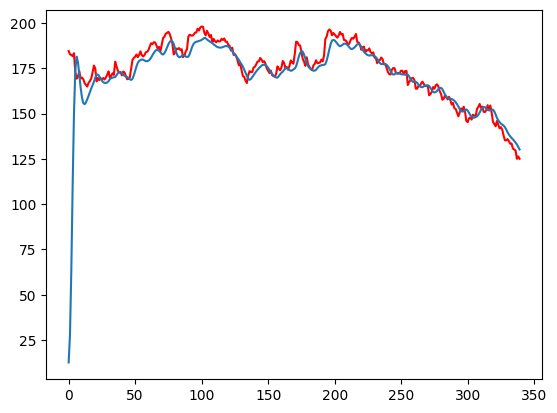

In [121]:
plt.plot(actual_prices , color='red')
plt.plot(prediction)

plt.show()

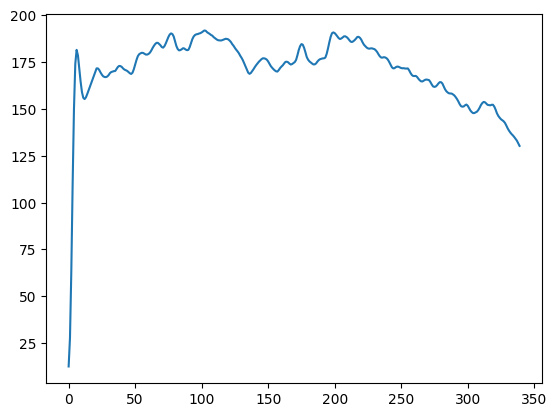

In [105]:
plt.plot(prediction)
plt.show()

In [116]:
real_data = [model_inputs[-60:-1,0]]
real_data

[array([0.88046927, 0.86199612, 0.86572627, 0.87739041, 0.86957485,
        0.86306188, 0.87164715, 0.8605159 , 0.84630579, 0.85133853,
        0.83440482, 0.83203646, 0.8194842 , 0.80782006, 0.8201947 ,
        0.83369431, 0.82617479, 0.83937835, 0.82279989, 0.79248498,
        0.78893245, 0.8013663 , 0.80438595, 0.79722169, 0.81314885,
        0.81024762, 0.80770164, 0.83179963, 0.83866785, 0.84825968,
        0.8356482 , 0.83949677, 0.82268147, 0.82185255, 0.82806947,
        0.84423348, 0.82694451, 0.84334534, 0.8215565 , 0.78964296,
        0.78289316, 0.77525522, 0.7926034 , 0.78093926, 0.76850542,
        0.77247241, 0.76406476, 0.7448811 , 0.72948681, 0.72913156,
        0.7334538 , 0.72646716, 0.71847398, 0.71894765, 0.70260602,
        0.69917191, 0.69603384, 0.66879779, 0.67673177])]

In [117]:
real_data = real_data = np.array(real_data)
real_data = np.reshape(real_data, (1, real_data.shape[1]))

real_data

array([[0.88046927, 0.86199612, 0.86572627, 0.87739041, 0.86957485,
        0.86306188, 0.87164715, 0.8605159 , 0.84630579, 0.85133853,
        0.83440482, 0.83203646, 0.8194842 , 0.80782006, 0.8201947 ,
        0.83369431, 0.82617479, 0.83937835, 0.82279989, 0.79248498,
        0.78893245, 0.8013663 , 0.80438595, 0.79722169, 0.81314885,
        0.81024762, 0.80770164, 0.83179963, 0.83866785, 0.84825968,
        0.8356482 , 0.83949677, 0.82268147, 0.82185255, 0.82806947,
        0.84423348, 0.82694451, 0.84334534, 0.8215565 , 0.78964296,
        0.78289316, 0.77525522, 0.7926034 , 0.78093926, 0.76850542,
        0.77247241, 0.76406476, 0.7448811 , 0.72948681, 0.72913156,
        0.7334538 , 0.72646716, 0.71847398, 0.71894765, 0.70260602,
        0.69917191, 0.69603384, 0.66879779, 0.67673177]])

In [118]:

predicts = model.predict(real_data)
predicts

1/1 [==============================] - 0s 67ms/step


array([[0.69957185]], dtype=float32)

In [119]:
predicts = scaler.inverse_transform(predicts)

In [120]:
print(predicts)

[[130.21754]]
